#***Project----TRAIN HEALTH INSURANCE CROSS SELL PREDICTION***

#**Problem Statement :**
Our client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

For example, you may pay a premium of Rs. 5000 each year for a health insurance cover of Rs. 200,000/- so that if, God forbid, you fall ill and need to be hospitalised in that year, the insurance provider company will bear the cost of hospitalisation etc. for upto Rs. 200,000. Now if you are wondering how can company bear such high hospitalisation cost when it charges a premium of only Rs. 5000/-, that is where the concept of probabilities comes in picture. For example, like you, there may be 100 customers who would be paying a premium of Rs. 5000 every year, but only a few of them (say 2-3) would get hospitalised that year and not everyone. This way everyone shares the risk of everyone else.

Just like medical insurance, there is vehicle insurance where every year customer needs to pay a premium of certain amount to insurance provider company so that in case of unfortunate accident by the vehicle, the insurance provider company will provide a compensation (called ‘sum assured’) to the customer.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue.

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

#**Data Description**

In order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.
Attribute Information:
id: Unique ID for the customer

Gender: Gender of the customer

Age: Age of the customer

Driving_License: 0 : Customer does not have DL, 1 : Customer already has DL

Region_Code: Unique code for the region of the customer

Previously_Insured: 1 : Customer already has Vehicle Insurance, 0 : Customer doesn't have Vehicle Insurance

Vehicle_Age: Age of the Vehicle

Vehicle_Damage: 1 : Customer got his/her vehicle damaged in the past. 0 : Customer didn't get his/her vehicle damaged in the past.

Annual_Premium: The amount customer needs to pay as premium in the year

Policy_Sales_Channel: Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

Vintage: Number of Days, Customer has been associated with the company

Response: 1 : Customer is interested, 0 : Customer is not interested

# Import Libraries

In [18]:
#Import Libraries
#Basic
import numpy as np
import pandas as pd
#Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
#Mix
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
# evaluation metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
# models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
# Hyper parameter tuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
# model explainability
from sklearn.tree import export_graphviz
import graphviz
import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [3]:
#Load Dataset
df = pd.read_csv('/content/TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION - TRAIN-HEALTH INSURANCE CROSS SELL PREDICTION (1).csv')

#Dataset Overview

In [19]:
#first 5 rows
df.head()

id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0   1    Male   44                1           28                   0   
1   2    Male   76                1            3                   0   
2   3    Male   47                1           28                   0   
3   4    Male   21                1           11                   1   
4   5  Female   29                1           41                   1   

  Vehicle_Age Vehicle_Damage  Annual_Premium  Policy_Sales_Channel  Vintage  \
0   > 2 Years            Yes           40454                    26      217   
1    1-2 Year             No           33536                    26      183   
2   > 2 Years            Yes           38294                    26       27   
3    < 1 Year             No           28619                   152      203   
4    < 1 Year             No           27496                   152       39   

   Response  
0         1  
1         0  
2         1  
3         0  
4         0

In [20]:
# Rows And Columns count
df.shape

(381109, 12)

In [21]:
#Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


In [22]:
# Checking Duplicates
df[df.duplicated()].count()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [23]:
# Checking Null Values/ Missing values
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [24]:
#Columns
column_series = df.columns
column_series

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [25]:
# Describe
df.describe()

id            Age  Driving_License    Region_Code  \
count  381109.000000  381109.000000    381109.000000  381109.000000   
mean   190555.000000      38.822584         0.997869      26.388807   
std    110016.836208      15.511611         0.046110      13.229888   
min         1.000000      20.000000         0.000000       0.000000   
25%     95278.000000      25.000000         1.000000      15.000000   
50%    190555.000000      36.000000         1.000000      28.000000   
75%    285832.000000      49.000000         1.000000      35.000000   
max    381109.000000      85.000000         1.000000      52.000000   

       Previously_Insured  Annual_Premium  Policy_Sales_Channel  \
count       381109.000000   381109.000000         381109.000000   
mean             0.458210    30564.389581            112.034295   
std              0.498251    17213.155057             54.203995   
min              0.000000     2630.000000              1.000000   
25%              0.000000    24405.000000             29.000000   
50%              0.000000    31669.000000            133.000000   
75%              1.000000    39400.000000            152.000000   
max              1.000000   540165.000000            163.000000   

             Vintage       Response  
count  381109.000000  381109.000000  
mean      154.347397       0.122563  
std        83.671304       0.327936  
min        10.000000       0.000000  
25%        82.000000       0.000000  
50%       154.000000       0.000000  
75%       227.000000       0.000000  
max       299.000000       1.000000

In [26]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

# Observation from General overview of Dataset
1.There are 381109 rows and 12 columns in dataset.

2.There is no null/missing and no duplicate values found.

3.There are 3 columns with Object Dtype and 9 with int64 Dtype.

4.The customers age ranges from 20 to 85, however the 75% of the customer is in range of 20 to 49 years.

5.Annual Premium ranges from 2630 to 540165, however the 75% of customer is in range of 2630 to 39400.

6.Id, Age, Annual_premium ,Annual_Premium, Policy_Sales_Channel ,Vintage, Region_Code feature is of numerical types and rest all are of the categorical types.



# **EDA**

# Checking Counts of Target Variable

In [27]:
'''Checking the counts of our target variable which will help us to choose our approch furthermore.
   Note : 0 = not interested and 1 = interested '''
response_counts = df['Response'].value_counts()
print(response_counts)
# pie chart using Plotly Express
fig = px.pie(
    response_counts,
    names=response_counts.index,
    values=response_counts.values,
    title="Distribution of Response Values"
)

# Show the pie chart
fig.show()


0    334399
1     46710
Name: Response, dtype: int64


# **From above pie chart we can see that only 12.3% customer are interested in buying the vehicle insurance which is clearly the case of class imbalance.**

# Now we will check our target variable with different features to check this imbalance situation


Gender wise Response Count

Male      206089
Female    175020
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

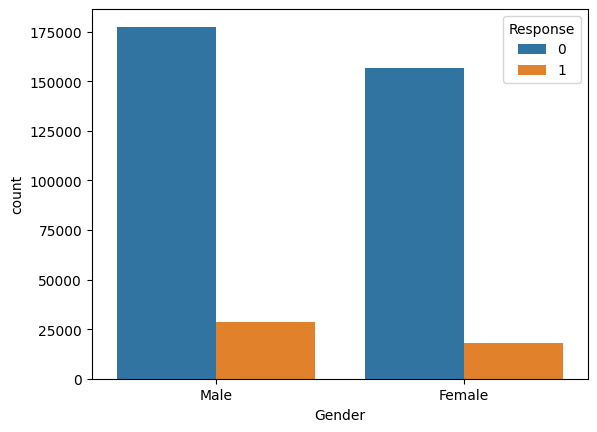

In [31]:
Value_counts = df['Gender'].value_counts()
print(Value_counts)

# Gender wise response count
sns.countplot(x=df['Gender'],hue = df['Response'])

**From above we can say that male customers are more interested in buying the vehicle insurance than the female customers.**

Age wise Response Count

In [14]:
Value_counts = df['Age'].value_counts()
print(Value_counts)
fig = px.histogram(df, x='Age', color='Response', barmode='group')
# Show the plot
fig.show()

24    25960
23    24256
22    20964
25    20636
21    16457
      ...  
81       56
82       29
83       22
84       11
85       11
Name: Age, Length: 66, dtype: int64


**From above histogram we can say that between age 20 to 25 response in negative is very high and for age between 40 to 50 response in positive way is quiet high compared to other ages.**

By Driving License response count.

In [44]:
#First we count the total cusotmer with license and without license
Value_counts = df['Driving_License'].value_counts()
print(Value_counts)
print()
#Now We will Check their respones for Vehicle Insurance
grouped = df.groupby(['Driving_License', 'Response']).size().reset_index(name='Count')
print(grouped)
print()
total_value_counts = Value_counts.sum()
# Calculate the percentage for each value in Value_counts
Value_counts_percentage = (Value_counts / total_value_counts) * 100

# Create a bar plot for the Value_counts with percentages
fig1 = px.bar(x=Value_counts.index, y=Value_counts, text=Value_counts_percentage,
              labels={'x': 'Values', 'y': 'Count', 'text': 'Percentage'},
              title='Value Counts with Percentage')

fig1.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Create a bar plot for Driving License with Response split and percentages
fig2 = px.bar(grouped, x='Driving_License', y='Count', color='Response',
              title='Driving License Response with Percentage',
              text='Count')

fig2.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Display the plots
fig1.show()
fig2.show()


1    380297
0       812
Name: Driving_License, dtype: int64

   Driving_License  Response   Count
0                0         0     771
1                0         1      41
2                1         0  333628
3                1         1   46669



1. Out of 812 customer who does not have license, 41(5%) were still interested in Vehicle Insurance.

2. Out of 380297 customer who have license, 46669(12.27%) were still interested in Vehicle Insurance.

3. Customer who having license will show more interest than cusotmer who doea not.

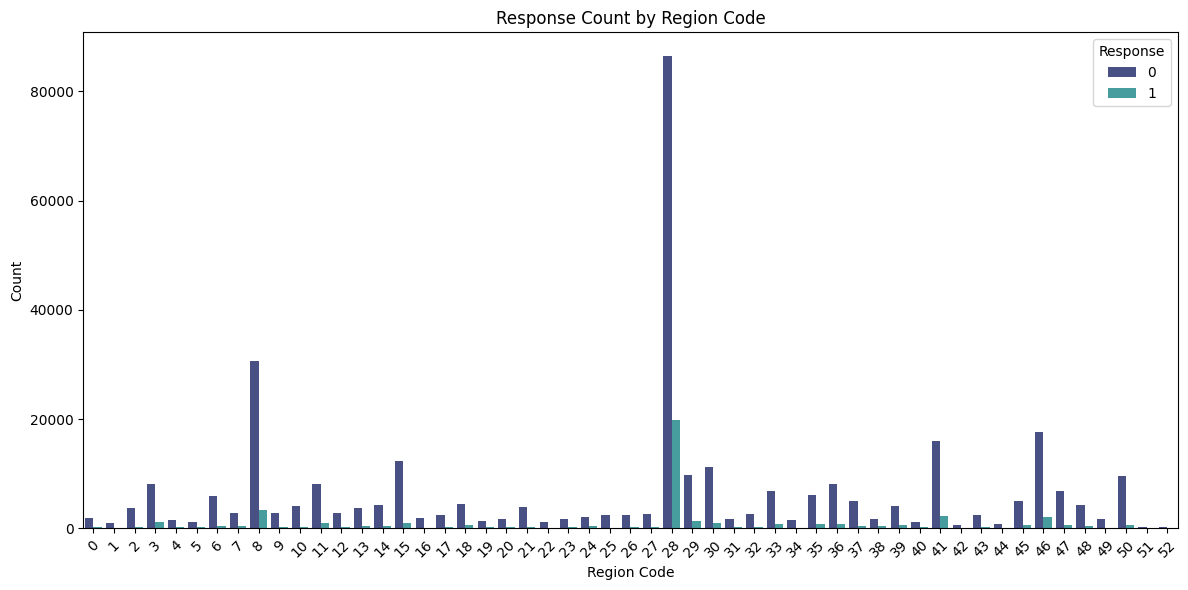

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

# Replace this with your actual data
# data = ...

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Region_Code', hue='Response', palette='mako')

plt.title('Response Count by Region Code')
plt.xlabel('Region Code')
plt.ylabel('Count')
plt.legend(title='Response')

plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()

plt.show()


In [53]:
df['Region_Code'].value_counts().iloc[:5]

28    106415
8      33877
46     19749
41     18263
15     13308
Name: Region_Code, dtype: int64

In [55]:
response_yes = df[df['Response'] == 1]
response_yes['Region_Code'].value_counts().iloc[:5]

28    19917
8      3257
41     2224
46     2032
29     1365
Name: Region_Code, dtype: int64

 Region Code : From all 53 unique region, region code 28 has maximum number of customer which is 106415 and out of it 19917 responded positively.


Previously Insured Wise Response Count

<Axes: xlabel='Previously_Insured', ylabel='count'>

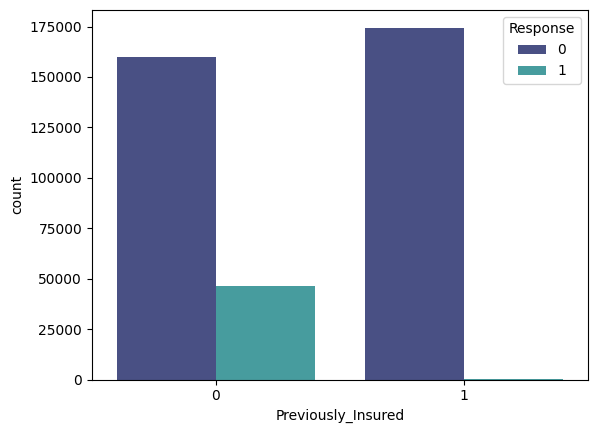

In [58]:
sns.countplot(x='Previously_Insured',hue='Response',data=df,palette="mako")

In [59]:
df['Previously_Insured'].value_counts()

0    206481
1    174628
Name: Previously_Insured, dtype: int64

In [61]:
insur_yes = df[df['Previously_Insured']==1]
print("out of 174628 customer who have previously insured", insur_yes[insur_yes['Response']== 1].shape[0]," were responded positively approximately", round(insur_yes[insur_yes['Response']== 1].shape[0]*100/df['Previously_Insured'].value_counts()[1],2),"%")

out of 174628 customer who have previously insured 158  were responded positively approximately 0.09 %


In [62]:
insur_no = df[df['Previously_Insured']==0]
print("out of 206481 customer who have previously insured", insur_no[insur_no['Response']== 1].shape[0]," were responded positively approximately", round(insur_no[insur_no['Response']== 1].shape[0]*100/df['Previously_Insured'].value_counts()[1],2),"%")

out of 206481 customer who have previously insured 46552  were responded positively approximately 26.66 %


**Previously Insured** :Customers who have taken vehicle insurance previously are less interested (0.09%) and Customers who have not taken Vehicle Insurance are showing more interest(26.66%).

Vehicle age wise response Count

In [65]:
df1= df.groupby('Vehicle_Age')['Response'].count()
df1

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Response, dtype: int64

In [68]:
response_yes = df[df['Response']==1]
df_yes = response_yes.groupby('Vehicle_Age')['Response'].count()
df_yes

Vehicle_Age
1-2 Year     34806
< 1 Year      7202
> 2 Years     4702
Name: Response, dtype: int64

In [70]:
#Overall Count
fig = px.pie(df, names='Vehicle_Age', title='Vehicle Age')
fig.update_traces(textinfo='percent+label')
fig.show()
#only Yes Response
fig = px.pie(names=df_yes.index, values=df_yes.values,
             title='Vehicle Age Distribution for Response 1')

fig.update_traces(textinfo='percent+label')
fig.show()


(1) with increase in age of vehicle the proportion of customer who shows interest in vehicle_insurance increases like it is maximum in case of customer having vehicle age greater than 2 years and minimum for the customer having new vehicles (i.e., less than 1 year)

(2) out of the total positive respondent the 74.5% have the vehicle of age 1-2 years.

In [77]:
df_yes = response_yes.groupby('Vehicle_Damage')['Response'].count()
df_yes

Vehicle_Damage
No       982
Yes    45728
Name: Response, dtype: int64

In [78]:
df['Vehicle_Damage'].value_counts()

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64

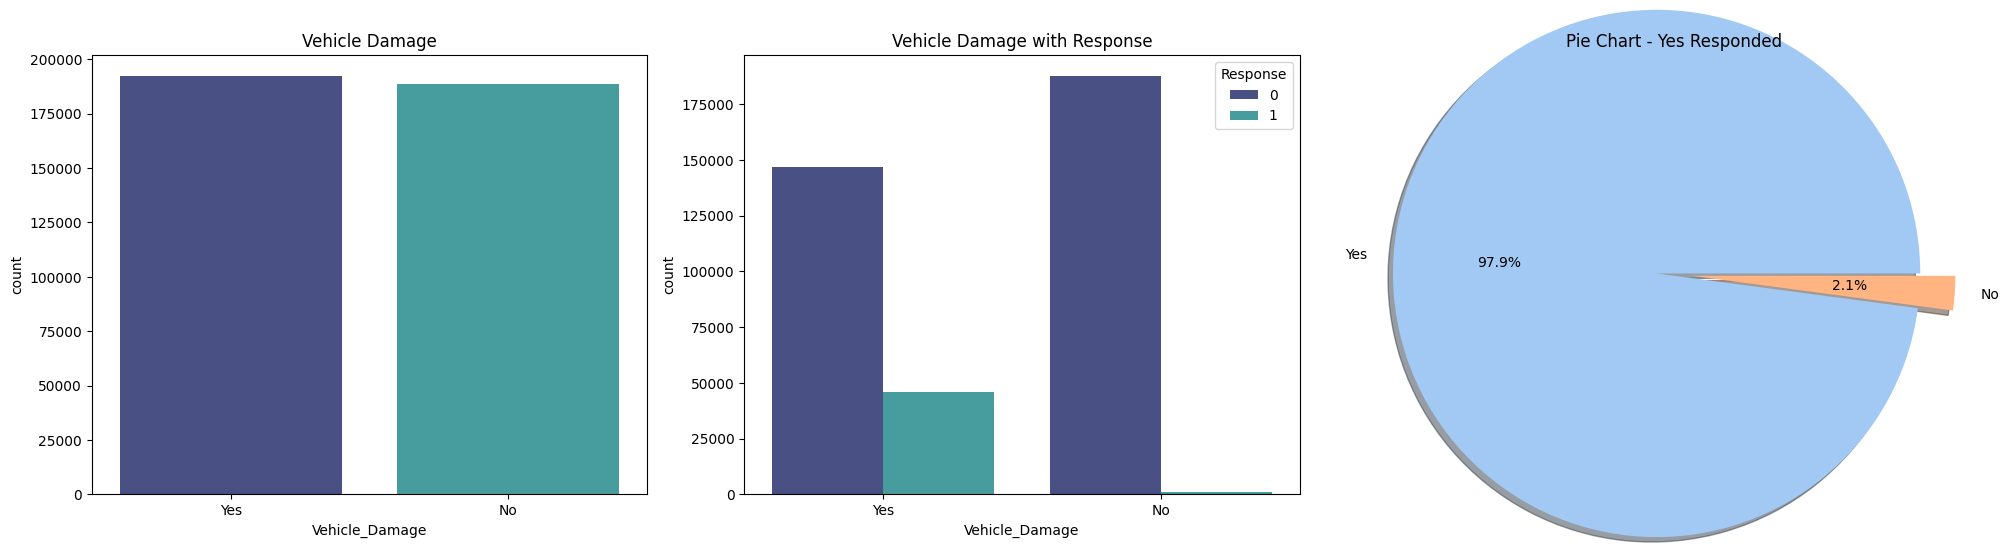

In [79]:
plt.figure(figsize=(20, 15))

plt.subplot(331)
sns.countplot(data=df, x='Vehicle_Damage', palette="mako")
plt.title('Vehicle Damage')

plt.subplot(332)
sns.countplot(data=df, x='Vehicle_Damage', hue='Response', palette="mako")
plt.title('Vehicle Damage with Response')

plt.subplot(333)
# Filter the DataFrame to only include rows with Response == 1
df_yes = df[df['Response'] == 1]
df_yes_counts = df_yes['Vehicle_Damage'].value_counts()

explode = [0.1, 0.1]
colors = sns.color_palette('pastel')
plt.pie(df_yes_counts, labels=df_yes_counts.index, explode=explode, radius=1.5, autopct='%1.1f%%', shadow=True, colors=colors)
plt.title("Pie Chart - Yes Responded")

plt.tight_layout()
plt.show()


(1) out of total customer, 192413 have suffered from vehicle damage and 45728 of them are showing interest in the vehicle_insurance.

(2) out of total customer, 188696 have not suffered from any vehicle_damage and only 982 of them are showing interest in vehicle damage.

(3) out of total positive respondent, 97.9% of them suffered from vehicle damage previously.

<Axes: xlabel='Response', ylabel='Annual_Premium'>

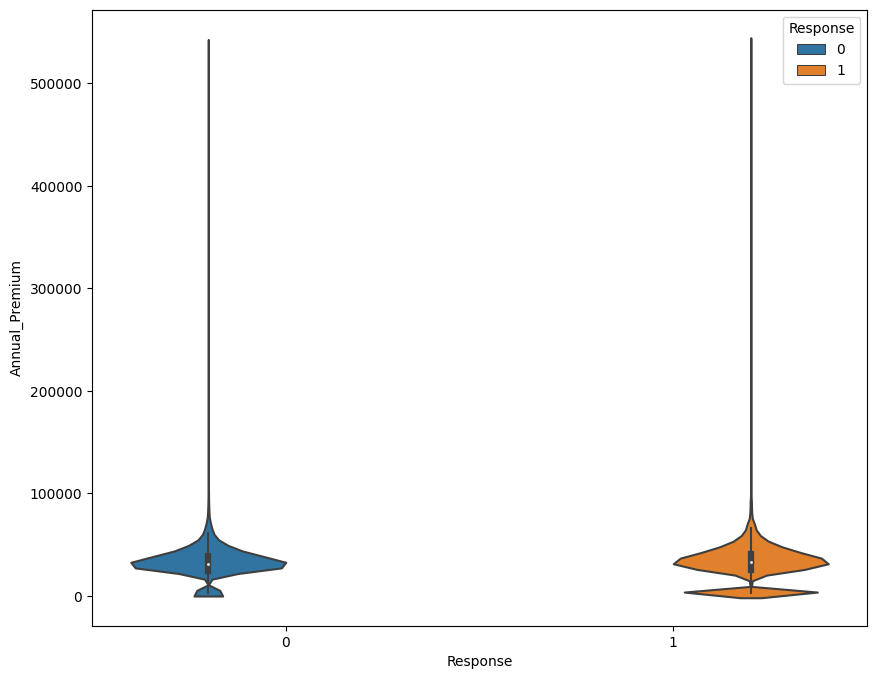

In [80]:
plt.figure(figsize=(10,8))
sns.violinplot(data = df, x = 'Response',y = 'Annual_Premium', hue = 'Response')

Violin plots also shows that the median,Iqr and pdf looks similar.

Policy_Sales_Channel wise Response Count

<Axes: xlabel='Policy_Sales_Channel', ylabel='Density'>

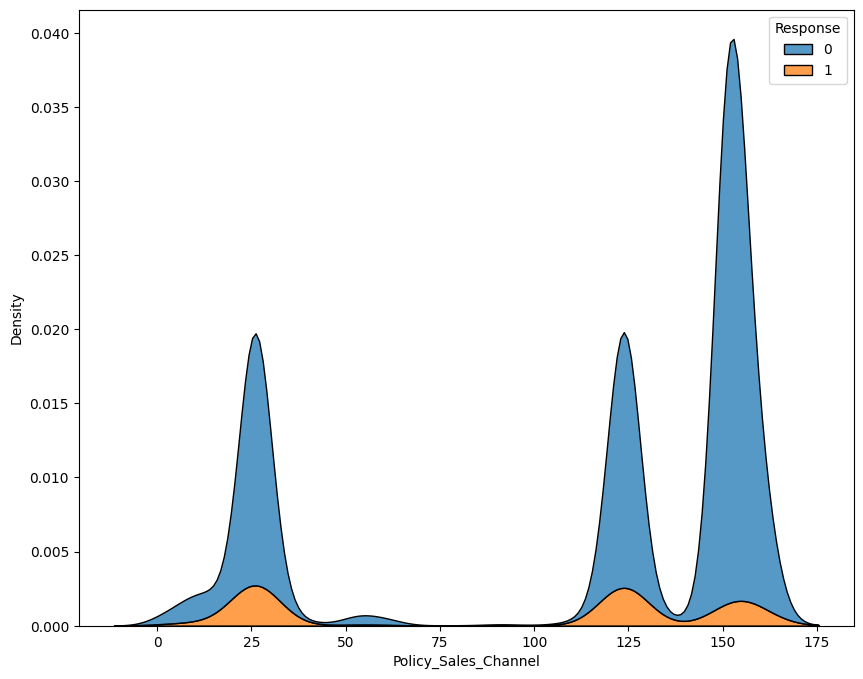

In [81]:
plt.figure(figsize=(10,8))
sns.kdeplot(x='Policy_Sales_Channel',data=df,hue='Response',multiple='stack')

In [82]:
pol_data = df['Policy_Sales_Channel'].value_counts().to_frame().reset_index()
pol_data_yes = df_yes['Policy_Sales_Channel'].value_counts().to_frame().reset_index()

In [83]:
policy_sales = pol_data.merge(pol_data_yes, on ='index', how='left')

In [84]:
# Lets add a column to find the converion rate of each policy_sales_channel
# Assuming conversion rate is the percentage of positive respondent out of the total customer reached by the particular policy sales
policy_sales['conversion_rate_in_perent'] = round(policy_sales['Policy_Sales_Channel_y']*100/policy_sales['Policy_Sales_Channel_x'],2)
ps_channel_x = policy_sales.sort_values(by='Policy_Sales_Channel_x', ascending=False)
ps_channel_y = policy_sales.sort_values(by='Policy_Sales_Channel_y', ascending=False)

Text(0.5, 1.0, 'Total customer reponded positively')

<Figure size 640x480 with 0 Axes>

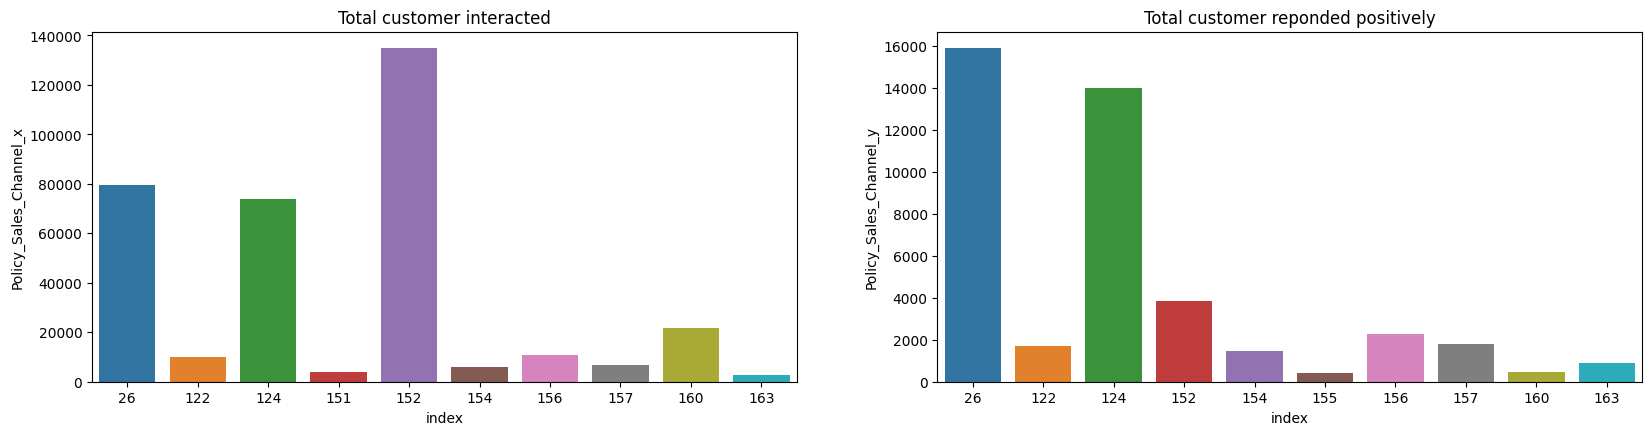

In [85]:
plt.figure(1)
plt.figure(figsize=(20,10))

plt.subplot(221)
sns.barplot(data=ps_channel_x[:10], x= 'index',y='Policy_Sales_Channel_x')
plt.title("Total customer interacted")

plt.subplot(222)
sns.barplot(data=ps_channel_y[:10], x= 'index',y='Policy_Sales_Channel_y')
plt.title("Total customer reponded positively")

In [86]:
ps_channel_y[:10]

index  Policy_Sales_Channel_x  Policy_Sales_Channel_y  \
1      26                   79700                 15891.0   
2     124                   73995                 13996.0   
0     152                  134784                  3858.0   
4     156                   10661                  2297.0   
6     157                    6684                  1794.0   
5     122                    9930                  1720.0   
7     154                    5993                  1474.0   
9     163                    2893                   880.0   
3     160                   21779                   475.0   
16    155                    1234                   395.0   

    conversion_rate_in_perent  
1                       19.94  
2                       18.91  
0                        2.86  
4                       21.55  
6                       26.84  
5                       17.32  
7                       24.60  
9                       30.42  
3                        2.18  
16                      32.01

(1) From kde plot, it can be seen that the maximum customer contacted by the policy_sales_channel 152, However maximum number of customer who responded positively were contacted by the policy_sales_channel 26.
(2) the top 3 policy_sales_channel who contacted most of the customers are 152,26,54 and the top 3 through which maximum positive response were observed are 26,124,152.
(3) the maximum conversion rate from top 10 policy_sales_channel belong to 163, Here total 2893 customer were contacted through this channel and 880 of them were interested making the conversion rate highest of 30.42%.

 Vintage wise response

<Axes: xlabel='Response', ylabel='Vintage'>

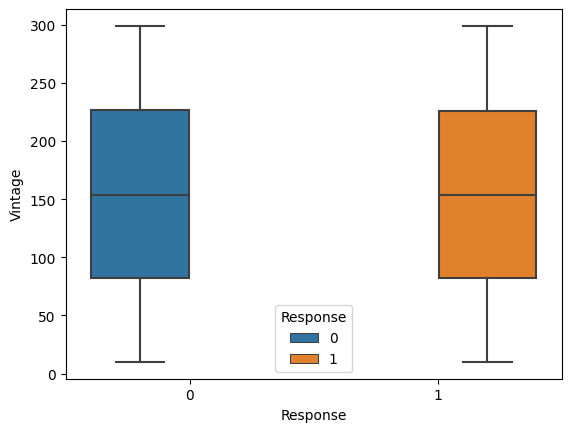

In [89]:
sns.boxplot(data = df, x= 'Response',y = 'Vintage', hue = 'Response')

From above we can say that it does not give any significance information which can impact the business positively or negatively.

<ipython-input-92-bc168163d670>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

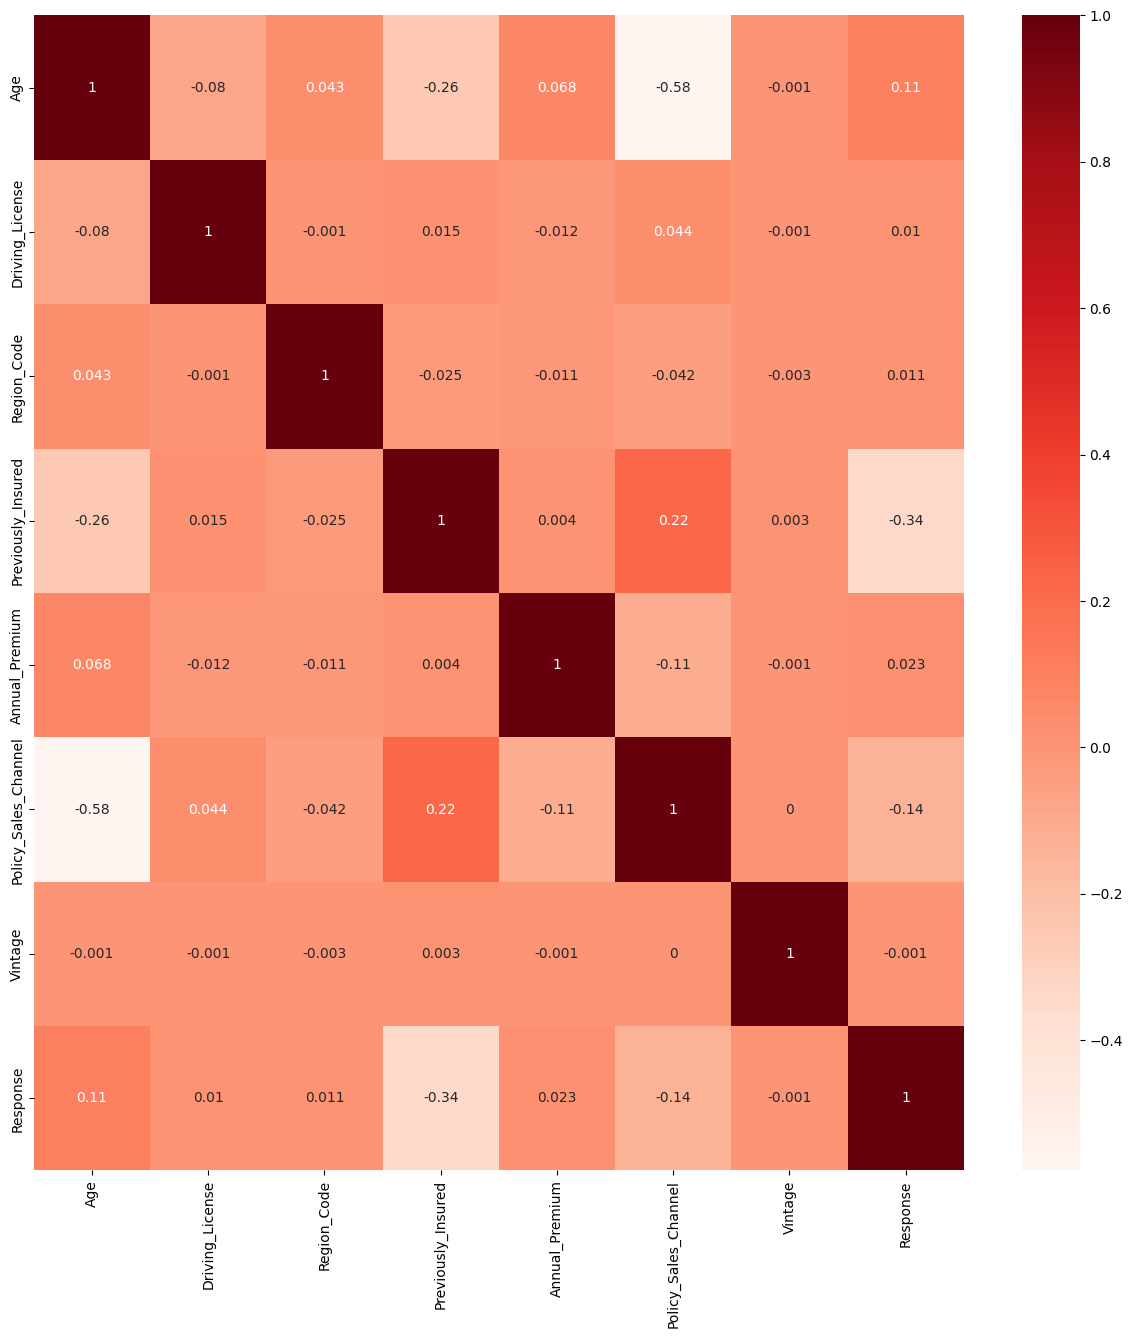

In [92]:
# Correlation Heatmap visualization code
corr = round(df.corr(),3)
plt.figure(figsize=(15,15))
sns.heatmap(corr,cmap="Reds",annot=True)

from above we can say that all the numerical columns are very weekly related to each other.

 # **Overall Observation from EDA:**
<br>

*   The dataset is unbalanced, having only  12.26 % of customer are interested in vehicle insurance.
*   The age group between 40-50 are showing more interest in vehicle insurance than the other age groups which might for segment the customer.



*  only 41 person out of total who showed interest does not driving license.
*  out of total 53 region, region having Region_Code 28 has the maximum number of customer which is equal to 106415. And 19917 of these customers responded positively.


*   Customers who have not taken vehicle insurance previously are more interested in taking the vehicle_insurance.
*   Approximately 74.5% of people who responded positively have vehicle age in between 1-2 years.

*   the top 3 policy_sales_channel who contacted most of the customers are 152,26,54 and the top 3 through which maximum positive response were observed are 26,124,152.
*   The median age of people not having driving license is approximately 65 but approximately 30 for people having driving license.
  

*   From Customer who responded positively, The median age is approximately 55 for customer having no license and approximately 40 for having license.













---



# Feature Engineering & Data Pre-processing

Handling Missing Values

In [94]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

Handling Outliers

<Axes: >

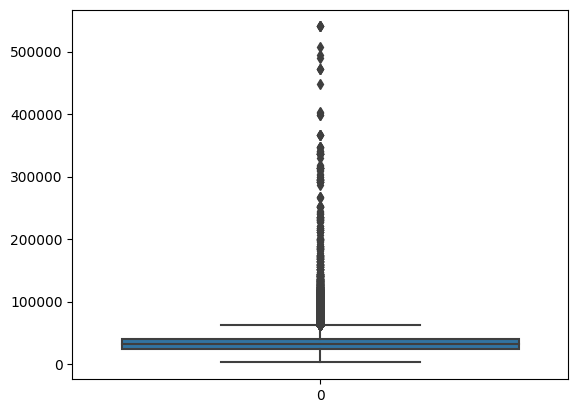

In [96]:
# Handling Outliers & Outlier treatments
sns.boxplot(df['Annual_Premium'])

In [97]:
# since there are many outliers that can be seen in the Annual_premium feature we will use this to remove using IQR method
def OutlierRemovaIQR(df,col):
    first_Quartile = df[col].quantile(0.25)
    third_Quartile = df[col].quantile(0.75)
    IQR = third_Quartile - first_Quartile
    low_lim = first_Quartile - 1.5 * IQR
    # considering minimum trip_duration of 15 second atleast
    if low_lim >=0:
      lower_lim = low_lim
    else:
      lower_lim = 0
    upper_limit = third_Quartile + 1.5* IQR

    df1 = df[(df[col]>lower_lim) & (df[col] < upper_limit)]
    data_loss = df.shape[0]-df1.shape[0]
    print("data loss by IQR method ", data_loss*100/df.shape[0])
    return df1

In [99]:
data1 = OutlierRemovaIQR(df,'Annual_Premium')

data loss by IQR method  2.70788672007221


Categorical Encoding

In [100]:
#categorical feature except region_code and policy_sales_channel
categorical_feature = ['Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage'] # Region_code and Policy_sales_channel have very high number of categorical so we will perform response coding on them
health_df = data1

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_feature:
    data1 = one_hot_encoding(data1, col)
data1.head()

Age  Region_Code  Annual_Premium  Policy_Sales_Channel  Vintage  Response  \
0   44           28           40454                    26      217         1   
1   76            3           33536                    26      183         0   
2   47           28           38294                    26       27         1   
3   21           11           28619                   152      203         0   
4   29           41           27496                   152       39         0   

   Gender_Male  Driving_License_1  Previously_Insured_1  Vehicle_Age_< 1 Year  \
0            1                  1                     0                     0   
1            1                  1                     0                     0   
2            1                  1                     0                     0   
3            1                  1                     1                     1   
4            0                  1                     1                     1   

   Vehicle_Age_> 2 Years  Vehicle_Damage_Yes  
0                      1                   1  
1                      0                   0  
2                      1                   1  
3                      0                   0  
4                      0                   0

In [102]:
data1.shape

(370789, 12)

Data Splitting

In [101]:
y = data1['Response']  # seperating response as target variable
x = data1.drop(['Response'],axis=1)
print("The shape of the x and y are ", x.shape,'and',y.shape)

The shape of the x and y are  (370789, 11) and (370789,)


 Handling Imbalanced Dataset

In [104]:
randomsample=  RandomOverSampler()
x_new,y_new=randomsample.fit_resample(x,y)

from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_new)))


Original dataset shape Counter({0: 325634, 1: 45155})
Resampled dataset shape Counter({1: 325634, 0: 325634})


In [105]:
## train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_new,y_new, test_size = 0.3,random_state = 42)
print('shape of x_train and y_train is',x_train.shape,"and",y_train.shape)
print('shape of x_test and y_test is',x_test.shape,"and",y_test.shape)

shape of x_train and y_train is (455887, 11) and (455887,)
shape of x_test and y_test is (195381, 11) and (195381,)


In [106]:

def ResponseCoding(x_train,x_test,y_train,col):

  '''
  This function will take x_train,x_test, y_train,col as input and return the probability of the category belonging to prticular class
  '''


  # creating 3 empty dictionary
  # total_count = unique category as key and total count as value
  total_count =dict()

  # count_1: category as key and number of times y_train = 1 as value
  count_1 =dict()

  # count_0: category as key and number of times y_train = 0 as value
  count_0 = dict()

  for i in range(x_train.shape[0]):
    ele = x_train[col].iloc[i]
    if ele in total_count.keys():
      total_count[ele] += 1
      if y_train.iloc[i] == 1:
        if ele in count_1.keys():
          count_1[ele] += 1
        else:
          count_1[ele] = 1
      else:
        if ele in count_0.keys():
          count_0[ele] += 1
        else:
          count_0[ele] =1

    else:
      total_count[ele] = 1

  # prob_0 : dictionary, key:unique category value: probability of belonging to class 0
  prob_0 = dict()
  # prob_1 : dictionary, key:unique category value: probability of belonging to class 1
  prob_1 = dict()

  for ele in total_count.keys():
    if ele in count_0.keys():
      prob_0[ele] = count_0[ele] / total_count[ele]
    else:
      prob_0[ele] = 0
    if ele in count_1.keys():
      prob_1[ele] = count_1[ele] / total_count[ele]
    else:
      prob_1[ele] = 0
  # creating the list of all different classes value
  x_train_prob_0 = []
  x_train_prob_1 = []
  x_test_prob_0 = []
  x_test_prob_1 = []
  for ele in x_train[col]:
    x_train_prob_0.append(prob_0[ele])
    x_train_prob_1.append(prob_1[ele])
  for ele in x_test[col]:
    if ele not in prob_0.keys():
      x_test_prob_0.append(0.5)
    else:
      x_test_prob_0.append(prob_0[ele])
    if ele not in prob_1.keys():
      x_test_prob_1.append(0.5)
    else:
      x_test_prob_1.append(prob_0[ele])


  return x_train_prob_0,x_train_prob_1, x_test_prob_0,x_test_prob_1




In [107]:
region_train_0,region_train_1,region_test_0,region_test_1= ResponseCoding(x_train,x_test,y_train,'Region_Code')
policy_train_0,policy_train_1,policy_test_0,policy_test_1= ResponseCoding(x_train,x_test,y_train,'Policy_Sales_Channel')

1.'Gender', 'Driving_License', 'Previously_Insured','Vehicle_Age', 'Vehicle_Damage' : these features having only 2-3 different categories so we performed one hot encoding

2.'Region_Code','Policy_Sales_Channel' : are categorical feature with category 53 and 155 categories so for that we used response coding (given a category probability of it belonging to class 0 and 1) which will just create two features for one variable.

Data transformation

In [108]:
data1.columns

Index(['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel',
       'Vintage', 'Response', 'Gender_Male', 'Driving_License_1',
       'Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years',
       'Vehicle_Damage_Yes'],
      dtype='object')

In [109]:
data_cat_x_train =np.asarray(x_train[['Gender_Male', 'Driving_License_1','Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']])
data_cat_x_test = np.asarray(x_test[['Gender_Male', 'Driving_License_1','Previously_Insured_1', 'Vehicle_Age_< 1 Year', 'Vehicle_Age_> 2 Years','Vehicle_Damage_Yes']])

# Policy_Sales_Channel and Region_Code region_train_0,region_train_1,region_test_0,region_test_1
region_x_train_0 = np.asarray(region_train_0).reshape(-1,1)
region_x_train_1 = np.asarray(region_train_1).reshape(-1,1)
region_x_test_1 = np.asarray(region_test_1).reshape(-1,1)
region_x_test_0 = np.asarray(region_test_0).reshape(-1,1)


# policy_train_0,policy_train_1,policy_test_0,policy_test_1
policy_x_train_0 = np.asarray(policy_train_0).reshape(-1,1)
policy_x_train_1 = np.asarray(policy_train_1).reshape(-1,1)
policy_x_test_1 = np.asarray(policy_test_1).reshape(-1,1)
policy_x_test_0 = np.asarray(policy_test_0).reshape(-1,1)

# numerical feature
data_num_x_train = np.asarray(x_train[['Age', 'Vintage', 'Annual_Premium']])
data_num_x_test = np.asarray(x_test[['Age', 'Vintage', 'Annual_Premium']])

In [110]:
# stacking the data
x_train1 = np.hstack((data_cat_x_train,region_x_train_0,region_x_train_1,policy_x_train_0,policy_x_train_1,data_num_x_train))
x_test1 = np.hstack((data_cat_x_test,region_x_test_0,region_x_test_1,policy_x_test_0,policy_x_test_1,data_num_x_test))
print("The shape of x_train and x_test",x_train1.shape, "and", x_test1.shape)

The shape of x_train and x_test (455887, 13) and (195381, 13)


 Data Scaling

In [111]:
# Scaling your data
## To remove scale effect lets normalize all the independent variable using MinMaxScalar()
scaler = MinMaxScaler()
x_train_final = scaler.fit_transform(x_train1)
x_test_final = scaler.transform(x_test1)

#ML Model Implementation

<br> In this section we will train six models, these are
<br> (1) Logistic regression
<br> (2) Multinomial Naive Bayes
<br> (3) Decision Tree Classifier
<br> (4) Random Forest Classifier
<br> (5) xgboost

**Evaluation Metrics:**
<br> (1) roc_auc :Recievers operating characteristics area under curve
<br> (2) precison : ratio of true positive to sum of false positive and true positive which represents that out of total positive points model is predicting how many of them are actually positive.
<br> (3) Recall : ratio of true positive to the total positive (actual).
<br> (4) accuracy : ratio of true prediction by total values.


In [112]:
def evaluation_matrix(y_train_pred, y_test_pred, y_train,y_test):
  '''
  This function take predicted and actual value and return the various evaluation metric along with the confusion matrix plot
  '''
  # (1)  calculating the train and test roc_auc score
  train_roc_auc = roc_auc_score(y_train,y_train_pred)
  test_roc_auc = roc_auc_score(y_test,y_test_pred)
  print(" The train and test roc_auc score are " ,train_roc_auc, " and ",test_roc_auc)

  # (2) calculating train and test precision score
  train_precision = precision_score(y_train, y_train_pred)
  test_precision = precision_score(y_test,y_test_pred)
  print(" The train and test precision score are " ,train_precision, " and ",test_precision)

  # (3) calculating train and test recall score
  train_recall = recall_score(y_train, y_train_pred)
  test_recall = recall_score(y_test,y_test_pred)
  print(" The train and test Recall score are " ,train_recall, " and ",test_recall)

  # (4) calculating the train and test accuracy score
  train_accuracy = accuracy_score(y_train, y_train_pred)
  test_accuracy = accuracy_score(y_test,y_test_pred)
  print(" The train and test Accuracy score are " ,train_accuracy, " and ",test_accuracy)

  # (5) plotting the confusion matrix
  train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
  test_confusion_matrix = confusion_matrix(y_test,y_test_pred)
  plt.figure(1)
  plt.figure(figsize=(25,10))

  ax= plt.subplot(331)
  sns.heatmap(train_confusion_matrix, annot = True, fmt ='d', ax = ax)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_ylim(2.0, 0)
  ax.set_title('Train Confusion Matrix');
  ax.xaxis.set_ticklabels(['0','1']);
  ax.yaxis.set_ticklabels(['0','1']);

  ax= plt.subplot(332)
  sns.heatmap(test_confusion_matrix, annot = True, fmt ='d', ax = ax)
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
  ax.set_ylim(2.0, 0)
  ax.set_title('Test Confusion Matrix');
  ax.xaxis.set_ticklabels(['0','1']);
  ax.yaxis.set_ticklabels(['0','1']);

  # (6) plot the train and test roc plot
  train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
  test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

  train_AUC_bow = auc(train_fpr, train_tpr)
  test_AUC_bow = auc(test_fpr, test_tpr)

  plt.subplot(333)
  plt.plot(train_fpr, train_tpr, label="train AUC ="+str(train_AUC_bow))
  plt.plot(test_fpr, test_tpr, label="test AUC ="+str(test_AUC_bow))
  plt.legend()
  plt.xlabel("False positive rate: FPR")
  plt.ylabel("True positive rate: FPR")
  plt.title("ERROR PLOTS")
  plt.grid()
  plt.show()
  return train_roc_auc,test_roc_auc, train_accuracy,test_accuracy, test_precision, test_recall


#1.Logistic regression

In [113]:
# ML Model - 1 Implementation
def LogisticRegressionModel(x_train,x_test,y_train):
  '''
  This function trains the logistic regression model and return the predicted train and test value
  '''

  logistic = LogisticRegression()  # default value of C = 1.0
  # Fit the Algorithm
  logistic.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = logistic.predict(x_train)
  y_test_pred = logistic.predict(x_test)
  return y_train_pred,y_test_pred,logistic

y_train_pred_log,y_test_pred_log,LR = LogisticRegressionModel(x_train_final,x_test_final,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



 The train and test roc_auc score are  0.7941773998937495  and  0.7039970597139388
 The train and test precision score are  0.7359990135808776  and  0.7000500550605666
 The train and test Recall score are  0.9169581762400313  and  0.7150321584506683
 The train and test Accuracy score are  0.794120034131265  and  0.7040090899319791


<Figure size 640x480 with 0 Axes>

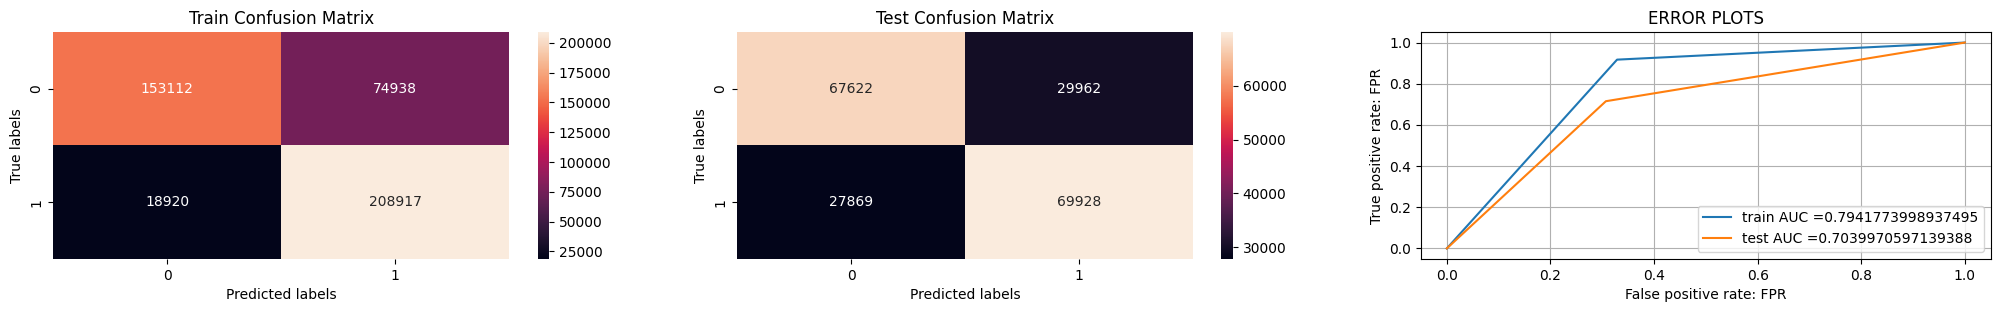

In [114]:
# evaluation matrix
train_roc_auc_log,test_roc_auc_log, train_accuracy_log,test_accuracy_log, test_precision_log, test_recall_log = evaluation_matrix(y_train_pred_log, y_test_pred_log, y_train,y_test)


Cross- Validation & Hyperparameter Tuning

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/

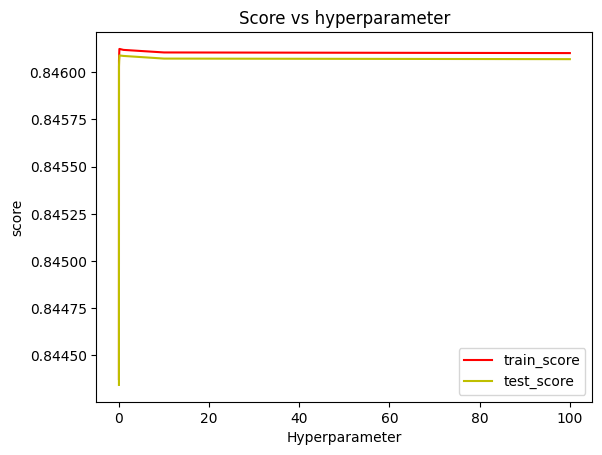

{'C': 0.1}
*** Scores from the best model ***
 The train and test roc_auc score are  0.7941554236342183  and  0.781637826905931
 The train and test precision score are  0.7360146574353011  and  0.7126918035314982
 The train and test Recall score are  0.9168484486716381  and  0.9451107907195517
 The train and test Accuracy score are  0.7940980988709921  and  0.7818160414779328


<Figure size 640x480 with 0 Axes>

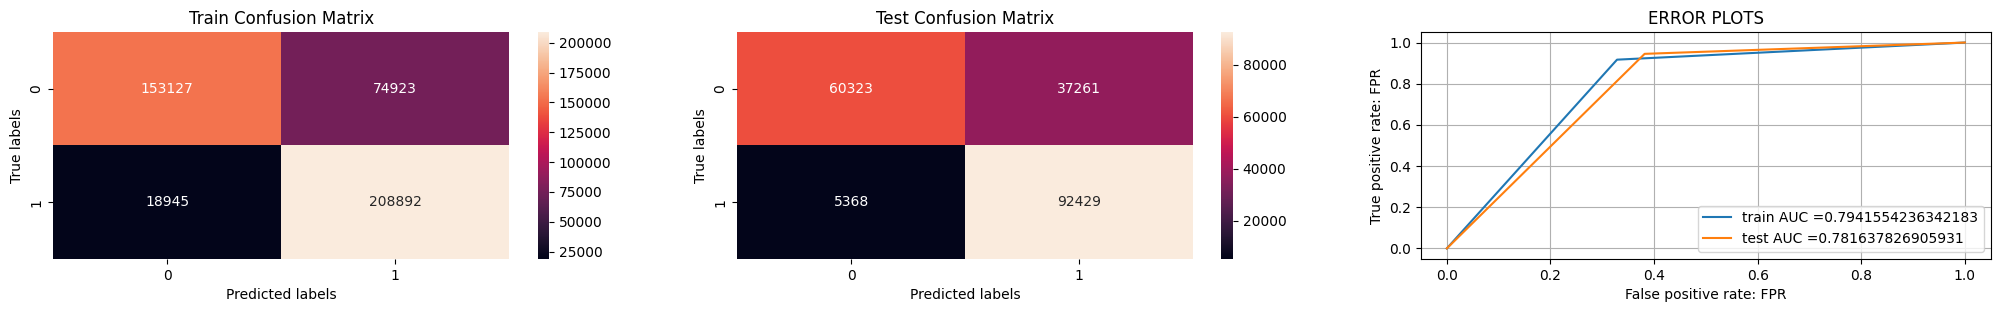

In [115]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# c is the hyper parameter for logistic regression
parameter = {'C' : [10**i for i in range(-3,3)]}

# calling the estimator
logistic = LogisticRegression()

# GridSearchCV
Gslr = GridSearchCV(estimator = logistic,param_grid = parameter,scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gslr.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gslr.cv_results_)
plt.plot(result['param_C'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_C'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs hyperparameter')
plt.legend()
plt.show()

# Predict on the model
y_train_pred_log_gs = Gslr.predict(x_train_final)
y_test_pred_log_gs = Gslr.predict(x_test_final)

#print best alpha
print(Gslr.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_log_gs,test_roc_auc_log_gs, train_accuracy_log_gs,test_accuracy_log_gs, test_precision_log_gs, test_recall_log_gs = evaluation_matrix(y_train_pred_log_gs, y_test_pred_log_gs, y_train,y_test)

There is significant improvement observed from hyperparameter tuning. the best param value obtained is C = 0.1 which gives approximately 8 % improvement in test score.

#Multinomial Naive Bayes

In [117]:
def MultinomialNaiveBayes(x_train,x_test,y_train):
  '''
  This function trains the  Multinomial Naive Bayes model and return the predicted train and test value
  '''

  clf = MultinomialNB(fit_prior=True)   # the default value of alpha = 1
  # Fit the Algorithm
  clf.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = clf.predict(x_train)
  y_test_pred = clf.predict(x_test)
  return y_train_pred,y_test_pred,clf

y_train_pred_nb,y_test_pred_nb,NB = MultinomialNaiveBayes(x_train_final,x_test_final,y_train)

 The train and test roc_auc score are  0.7704285095724257  and  0.7598550543070332
 The train and test precision score are  0.721625366661268  and  0.7196278620189693
 The train and test Recall score are  0.8800150985134109  and  0.8526232911029991
 The train and test Accuracy score are  0.770377308411953  and  0.7599561881656866


<Figure size 640x480 with 0 Axes>

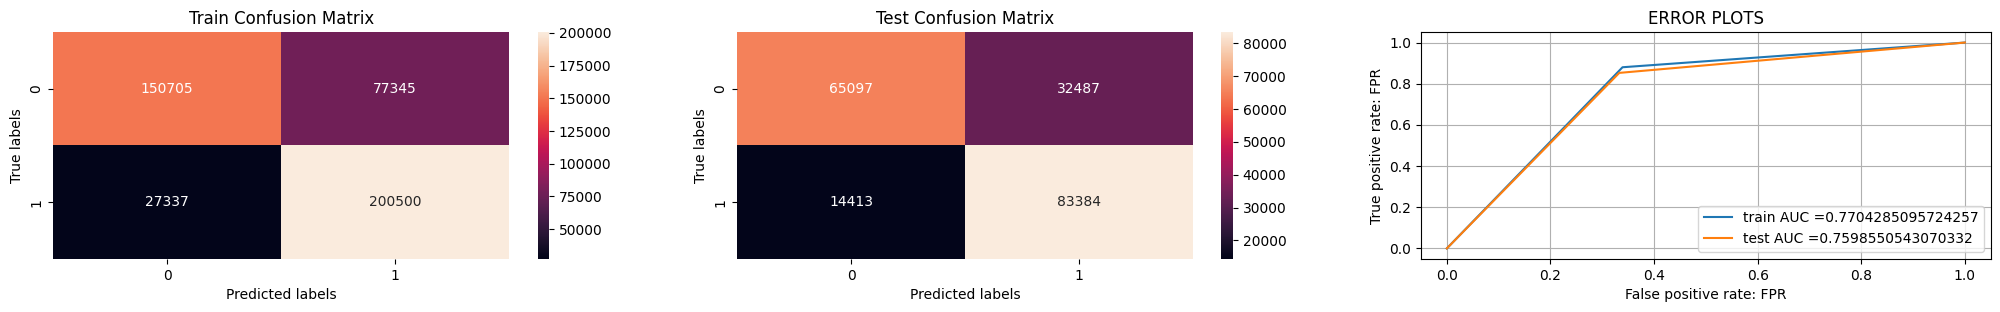

In [118]:
# Visualizing evaluation Metric Score chart
train_roc_auc_nb,test_roc_auc_nb, train_accuracy_nb,test_accuracy_nb, test_precision_nb, test_recall_nb = evaluation_matrix(y_train_pred_nb, y_test_pred_nb, y_train,y_test)

Cross- Validation & Hyperparameter Tuning

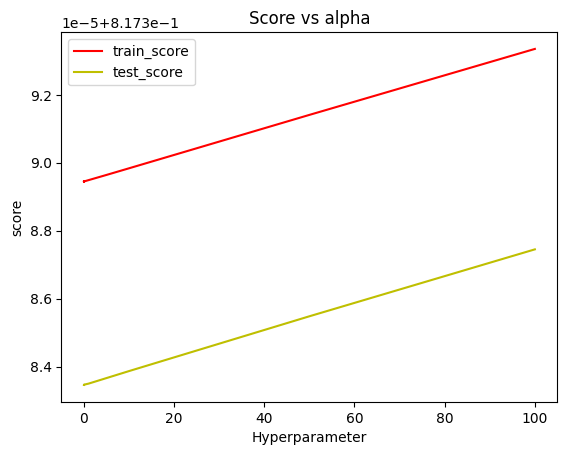

{'alpha': 100}
*** Scores from the best model ***
 The train and test roc_auc score are  0.7704943666106965  and  0.76005936984589
 The train and test precision score are  0.721639468144443  and  0.7196601837077925
 The train and test Recall score are  0.88019066262284  and  0.8532061310674152
 The train and test Accuracy score are  0.7704431141927714  and  0.760160916363413


<Figure size 640x480 with 0 Axes>

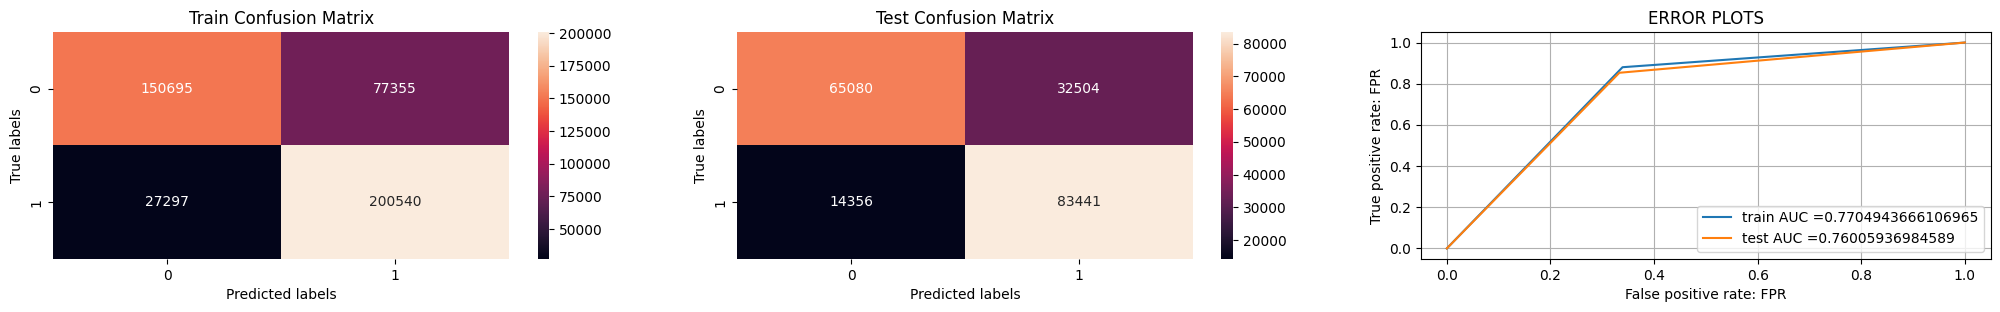

In [119]:
# c is the hyper parameter for logistic regression
parameter = {'alpha' : [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]}

# calling the estimator
clf = MultinomialNB(fit_prior=True)

# GridSearchCV
Gsnb = GridSearchCV(estimator = clf,param_grid = parameter,scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gsnb.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
result = pd.DataFrame(Gsnb.cv_results_)
plt.plot(result['param_alpha'],result['mean_train_score'],'r',label = 'train_score')
plt.plot(result['param_alpha'],result['mean_test_score'],'y',label ='test_score')
plt.xlabel('Hyperparameter')
plt.ylabel('score')
plt.title('Score vs alpha')
plt.legend()
plt.show()

# Predict on the model
y_train_pred_nb_gs = Gsnb.predict(x_train_final)
y_test_pred_nb_gs = Gsnb.predict(x_test_final)

#print best alpha
print(Gsnb.best_params_)
print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_nb_gs,test_roc_auc_nb_gs, train_accuracy_nb_gs,test_accuracy_nb_gs, test_precision_nb_gs, test_recall_nb_gs = evaluation_matrix(y_train_pred_nb_gs, y_test_pred_nb_gs, y_train,y_test)

A very slight improvement (almost negligible) has been observed after the hyperparameter tuning. The best alpha value obtained from the hyperparameter tuning is 100.

#Decision Tree Classifier

In [121]:
def decisiontrees(x_train,x_test,y_train):
  '''
  This function trains the  Decision Tree Classifier model and return the predicted train and test value
  '''

  model = DecisionTreeClassifier(max_depth = 8,random_state = 42)   # for max_depth = none model was highly overfitting , so use a random depth = 8.

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_dtc,y_test_pred_dtc,dtc = decisiontrees(x_train_final,x_test_final,y_train)

 The train and test roc_auc score are  0.8007275454064587  and  0.750723422864032
 The train and test precision score are  0.7392267277757595  and  0.7067937619993937
 The train and test Recall score are  0.928795586318289  and  0.8582676360215549
 The train and test Accuracy score are  0.8006677093227049  and  0.7508406651619144


<Figure size 640x480 with 0 Axes>

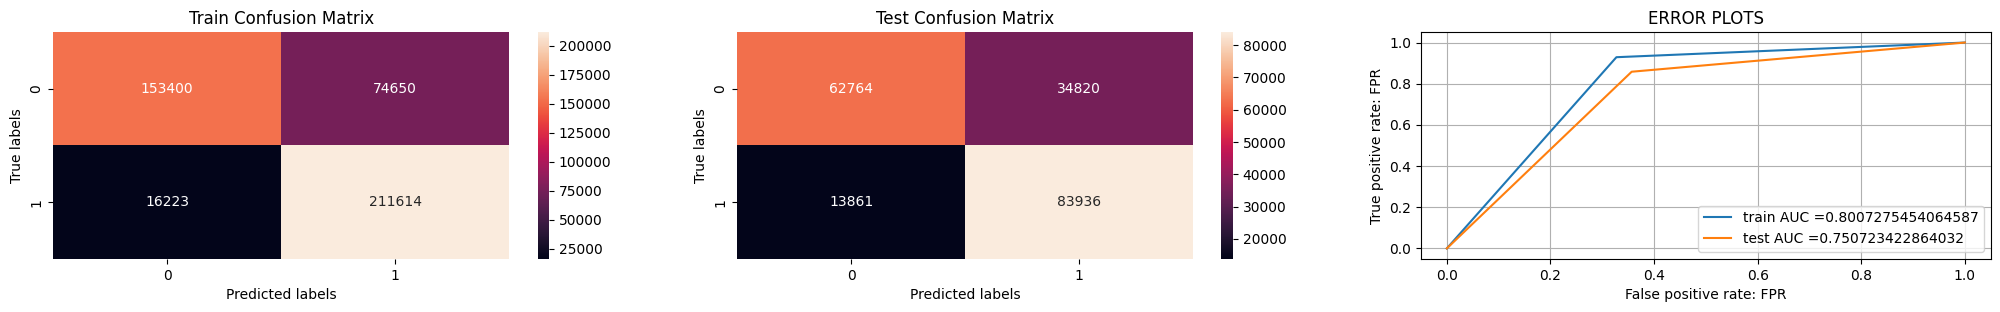

In [122]:
# Visualizing evaluation Metric Score chart
train_roc_auc_dtc,test_roc_auc_dtc, train_accuracy_dtc,test_accuracy_dtc, test_precision_dtc, test_recall_dtc = evaluation_matrix(y_train_pred_dtc, y_test_pred_dtc, y_train,y_test)

Cross- Validation & Hyperparameter Tuning

----------------------------------------------------------------------------------------------------


<ipython-input-123-60c734bb0c1e>:25: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

<ipython-input-123-60c734bb0c1e>:25: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-123-60c734bb0c1e>:25: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-123-60c734bb0c1e>:30: FutureWarning:

In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.

<ipython-input-123-60c734bb0c1e>:30: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)

<ipython-input-123-60c734bb0c1e>:30: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequ

<Figure size 640x480 with 0 Axes>

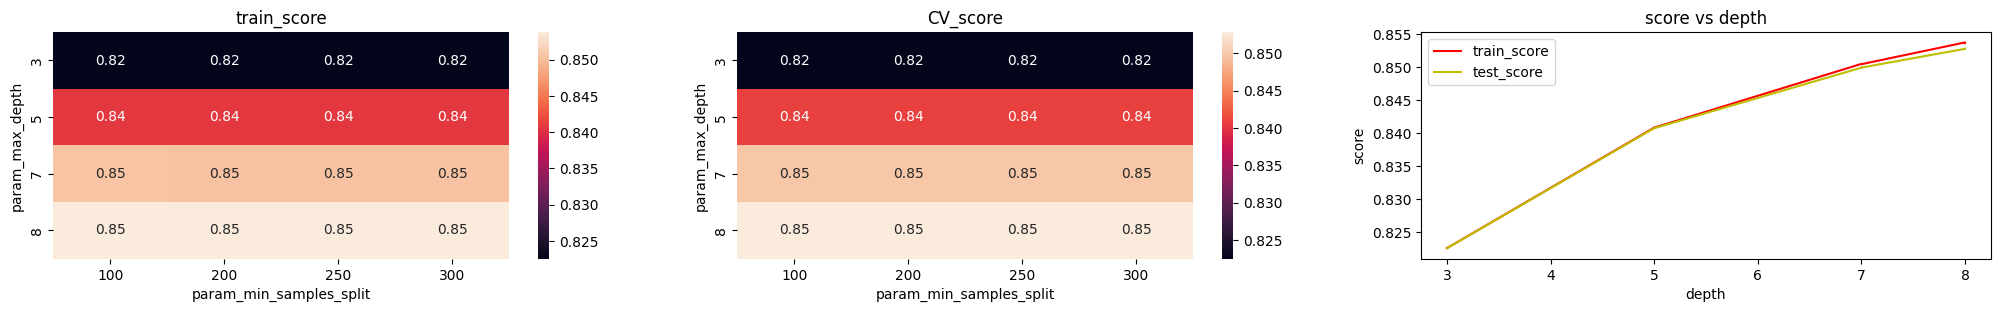

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
The best parameters are: {'max_depth': 8, 'min_samples_split': 200}
The scores on best parameters are:
*** Scores from the best model ***
 The train and test roc_auc score are  0.8004222854956359  and  0.7448948143325448
 The train and test precision score are  0.7392773326151661  and  0.7007649303695769
 The train and test Recall score are  0.9277202561480357  and  0.8561919077272309
 The train and test Accuracy score are  0.8003628092049127  and  0.7450161479365957


<Figure size 640x480 with 0 Axes>

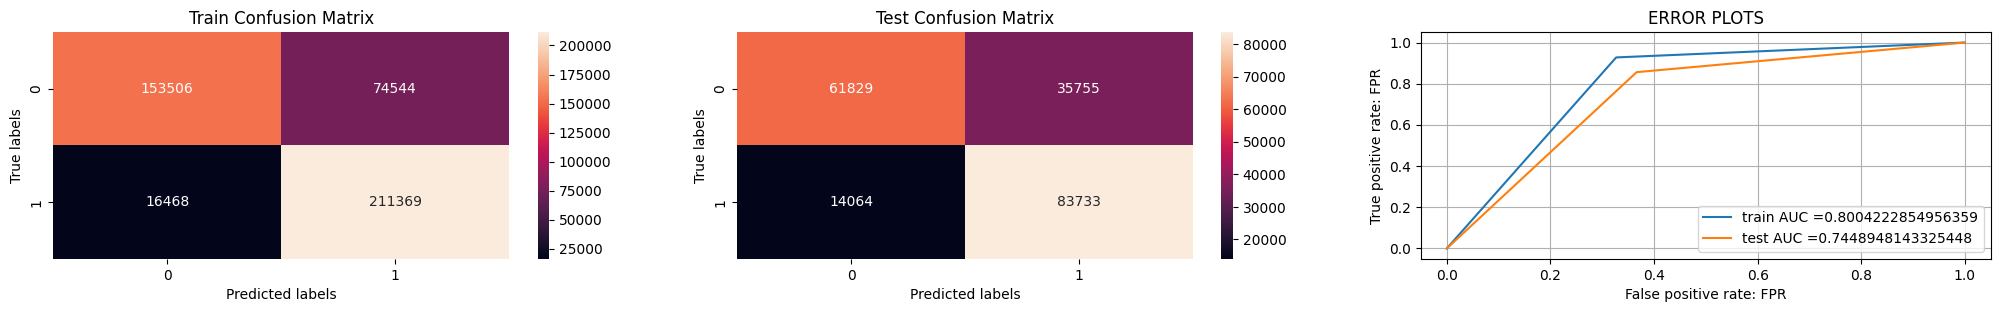

In [123]:
# c is the hyper parameter for logistic regression
parameter = {'max_depth' : [3,5,7,8], 'min_samples_split' : [100,200,250,300]}

# calling the estimator
dtc =  DecisionTreeClassifier(random_state = 42)

# GridSearchCV
Gsdtc = GridSearchCV(estimator =dtc, param_grid = parameter, scoring ='roc_auc', refit = True, return_train_score = True)

# Fit the Algorithm
Gsdtc.fit(x_train_final,y_train)

# plotting the train and test score for various hyperparameter
results = pd.DataFrame(Gsdtc.cv_results_)
train_score_dt = results['mean_train_score']
test_score_dt = results['mean_test_score']
best_max_depth = results['param_max_depth']
print("-"*100)
# Lets plot the results
plt.figure(1)
plt.figure(figsize=(25,10))

#heatmap
plt.subplot(331)
dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_train_score')
ax = sns.heatmap(dataset_train, annot=True)
plt.title('train_score')

plt.subplot(332)
dataset_train = results.pivot('param_max_depth', 'param_min_samples_split', 'mean_test_score')
ax = sns.heatmap(dataset_train, annot=True)
plt.title('CV_score')

plt.subplot(333)
plt.plot(best_max_depth,train_score_dt,'r',label = 'train_score')
plt.plot(best_max_depth,test_score_dt,'y',label ='test_score')
plt.xlabel('depth')
plt.ylabel('score')
plt.title('score vs depth')
plt.legend()
plt.show()

print("-"*200)
print("The best parameters are:",Gsdtc.best_params_)
print("The scores on best parameters are:")

# Predict on the model
y_train_pred_dtc_gs = Gsdtc.predict(x_train_final)
y_test_pred_dtc_gs = Gsdtc.predict(x_test_final)

#print best alpha

print('*** Scores from the best model ***')
# evaluation metrics
train_roc_auc_dtc_gs,test_roc_auc_dtc_gs, train_accuracy_dtc_gs,test_accuracy_dtc_gs, test_precision_dtc_gs, test_recall_dtc_gs = evaluation_matrix(y_train_pred_dtc_gs, y_test_pred_dtc_gs, y_train,y_test)

About 1% improvement is test score is observed after the hyperparameter tuning.

#Random Forest Classifier:

In [124]:
def Randomforest(x_train,x_test,y_train):
  '''
  This function trains the  Random forest Classifier model and return the predicted train and test value
  '''

  model = RandomForestClassifier(max_depth = 10, n_estimators = 200, min_samples_split = 100,random_state = 42)   # using the best hyperparameter obtained from decision trees with n_estimator =200

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_rf,y_test_pred_rf,rf = Randomforest(x_train_final,x_test_final,y_train)

 The train and test roc_auc score are  0.8041250060840942  and  0.7873761871533573
 The train and test precision score are  0.7403887539048941  and  0.7142411302170156
 The train and test Recall score are  0.9362219481471403  and  0.9594568340542143
 The train and test Accuracy score are  0.8040632876129392  and  0.7875637856291041


<Figure size 640x480 with 0 Axes>

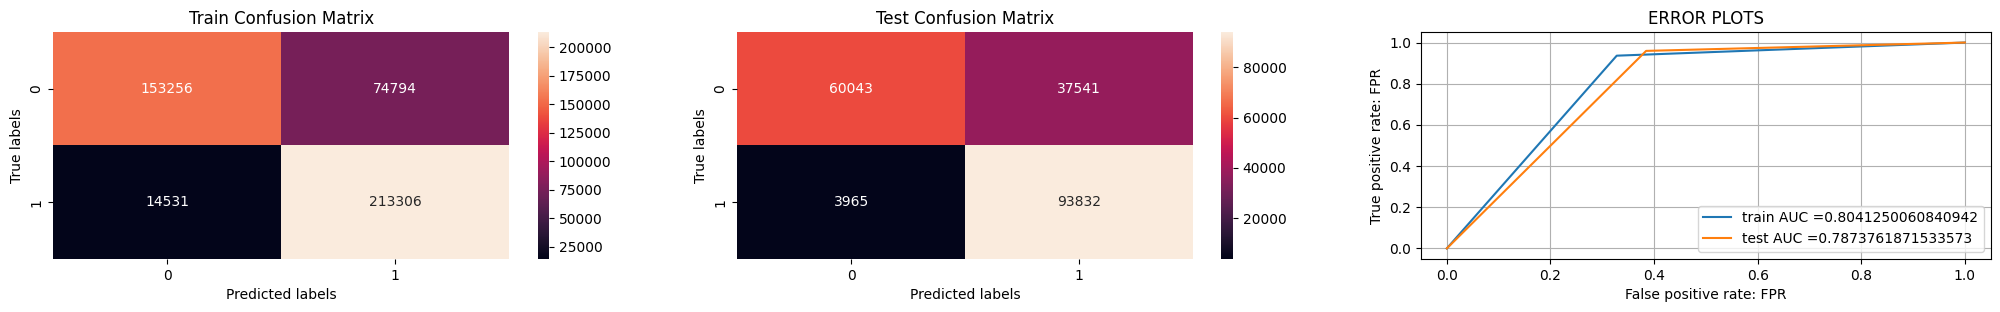

In [125]:
train_roc_auc_rf,test_roc_auc_rf, train_accuracy_rf,test_accuracy_rf, test_precision_rf, test_recall_rf = evaluation_matrix(y_train_pred_rf, y_test_pred_rf, y_train,y_test)

Cross- Validation & Hyperparameter Tuning

RandomForestClassifier(max_depth=13, min_samples_split=150, random_state=42)
 The train and test roc_auc score are  0.8094057067902864  and  0.7834241536763206
 The train and test precision score are  0.7438374036634702  and  0.7268655130416303
 The train and test Recall score are  0.9433937420173194  and  0.9092712455392292
 The train and test Accuracy score are  0.8093431047606096  and  0.7835613493635513


<Figure size 640x480 with 0 Axes>

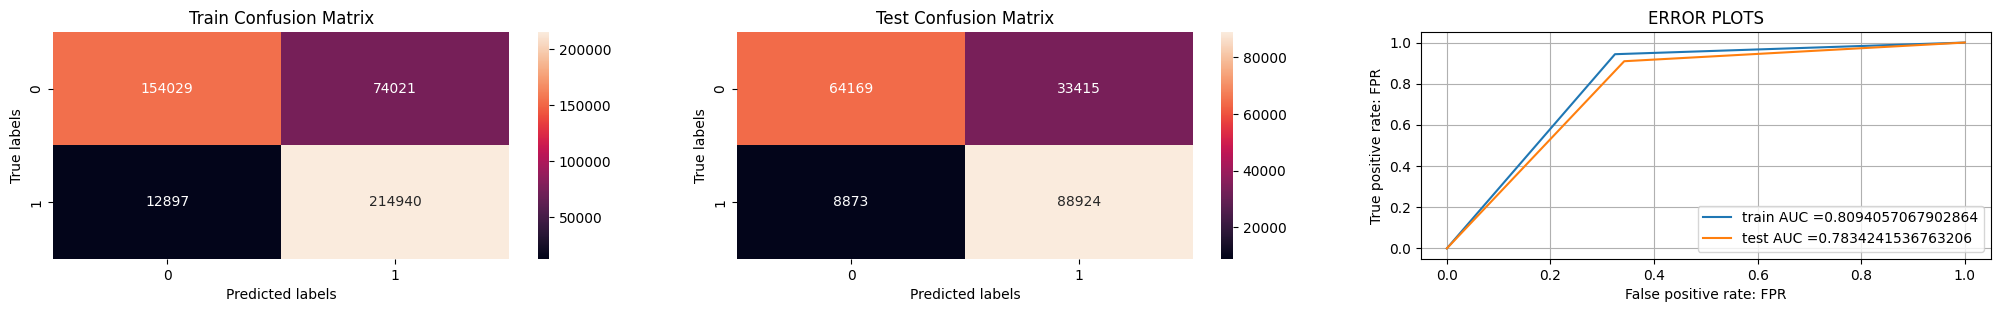

In [126]:
parameter = {'max_depth' : [8,10,11,13], 'n_estimators':[100,150,200,250],'min_samples_split': [100,150,200,300]}

model = RandomForestClassifier(random_state=42)

rand = RandomizedSearchCV(estimator = model, param_distributions = parameter,n_iter = 5, cv = 3,random_state= 42,n_jobs = -1,refit=True, return_train_score = True)
rand.fit(x_train_final,y_train)
print(rand.best_estimator_)
y_train_pred_cv_rf = rand.predict(x_train_final)
y_test_pred_cv_rf = rand.predict(x_test_final)
train_roc_auc_rf_cv,test_roc_auc_rf_cv, train_accuracy_rf_cv,test_accuracy_rf_cv, test_precision_rf_cv, test_recall_rf_cv = evaluation_matrix(y_train_pred_cv_rf, y_test_pred_cv_rf, y_train,y_test)

There is not any improvement seen with the hyperparameter tuning, The original model was performing better.

#xgboost Classifier

In [127]:
def XGboost(x_train,x_test,y_train):
  '''
  This function trains the  xgboost Classifier model and return the predicted train and test value
  '''

  model = XGBClassifier(max_depth = 3, n_estimators = 500, min_samples_split = 100,learning_rate = 0.05,random_state = 42)

  # Fit the Algorithm
  model.fit(x_train,y_train)
  # Predict on the model
  y_train_pred = model.predict(x_train)
  y_test_pred = model.predict(x_test)
  return y_train_pred,y_test_pred,model

y_train_pred_xb,y_test_pred_xb,xgb = XGboost(x_train_final,x_test_final,y_train)

[09:40:23] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.



 The train and test roc_auc score are  0.8025762916296231  and  0.7862275064720052
 The train and test precision score are  0.7410249862703191  and  0.7269334153766436
 The train and test Recall score are  0.9297963017420349  and  0.9180751965806722
 The train and test Accuracy score are  0.8025168517637046  and  0.7863712438773474


<Figure size 640x480 with 0 Axes>

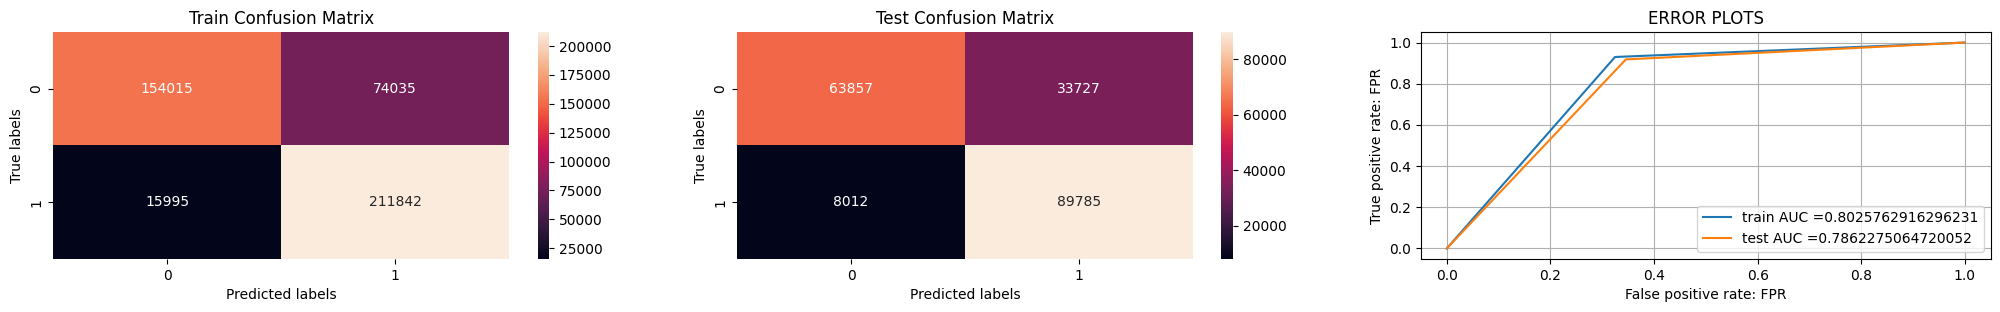

In [128]:
train_roc_auc_xb,test_roc_auc_xb, train_accuracy_xb,test_accuracy_xb, test_precision_xb, test_recall_xb = evaluation_matrix(y_train_pred_xb, y_test_pred_xb, y_train,y_test)

Cross- Validation & Hyperparameter Tuning

[09:52:20] WARNING: ../src/learner.cc:767: 
Parameters: { "min_samples_split" } are not used.

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, min_samples_split=100, missing=nan,
              monotone_constraints=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, predictor=None, ...)
 The train and test roc_auc score are  0.804742270083024  and  0.7951585688308618
 The train and test precision score are  0.7437728545284019  and  0.74

<Figure size 640x480 with 0 Axes>

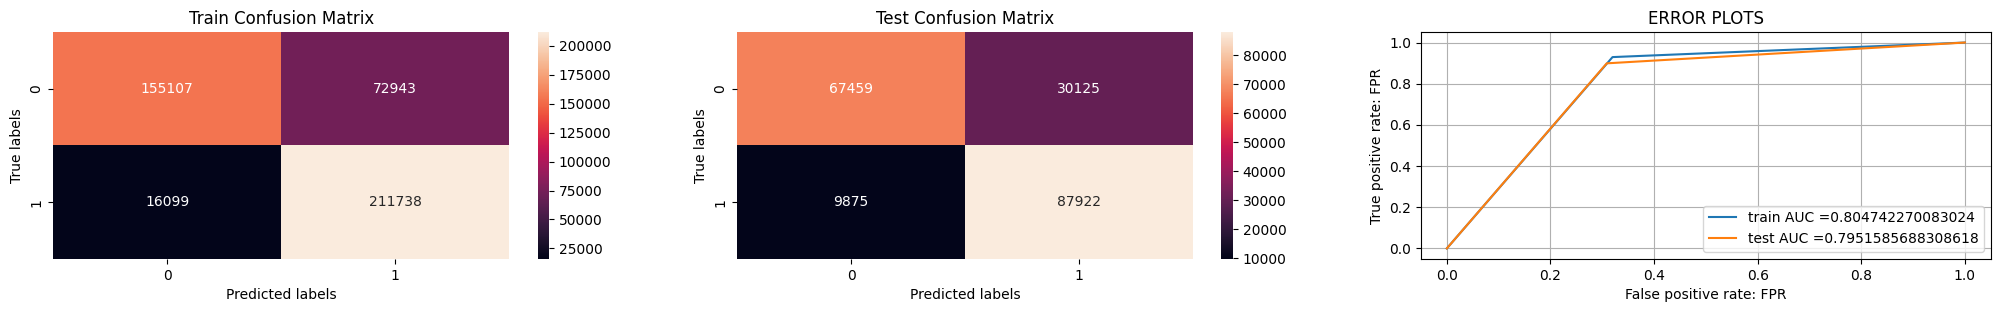

In [129]:
xgbc = XGBClassifier(random_state = 42)
parameter = {'max_depth' : [1,2,3,4,5], 'n_estimators':[300,350,500,700],'min_samples_split': [50,100,150], 'learning_rate' :[0.05,0.07,0.1]}
# using GridSearchCV will have 4*4*3*4 =192 models so will use RandomizedSearchCv for just 10 models to find the hyperparameter
random = RandomizedSearchCV(estimator = xgbc, param_distributions = parameter, n_iter = 5,cv =3, refit = True,random_state= 42,n_jobs = -1, return_train_score = True)
random.fit(x_train_final,y_train)
print(random.best_estimator_)
y_train_pred_cv_xb = random.predict(x_train_final)
y_test_pred_cv_xb = random.predict(x_test_final)
train_roc_auc_rf_xb,test_roc_auc_xb_cv, train_accuracy_xb_cv,test_accuracy_xb_cv, test_precision_xb_cv, test_recall_xb_cv = evaluation_matrix(y_train_pred_cv_xb, y_test_pred_cv_xb, y_train,y_test)

 It does not shows any improvement over the base model without hyperparameter tuning

# Comparisons of Model without hyperparameter tunning

In [130]:
print("-"*50,"Models without hyperparameter tuning ",'-'*50)
from prettytable import PrettyTable

Table = PrettyTable()

Table.field_names = ["Model ","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["Logistic Regression", round(train_roc_auc_log,6), round(test_roc_auc_log,6),round(train_accuracy_log,6),round(test_accuracy_log,6),round(test_precision_log,6),round(test_recall_log,6)])
Table.add_row(["Multinomial Naive Bayes",round(train_roc_auc_nb,6), round(test_roc_auc_nb,6),round(train_accuracy_nb,6),round(test_accuracy_nb,6),round(test_precision_nb,6),round(test_recall_nb,6)])
Table.add_row(["Decision tree ", round(train_roc_auc_dtc,6), round(test_roc_auc_dtc,6),round(train_accuracy_dtc,6),round(test_accuracy_dtc,6),round(test_precision_dtc,6),round(test_recall_dtc,6)])
Table.add_row(["Random forest", round(train_roc_auc_rf,6), round(test_roc_auc_rf,6),round(train_accuracy_rf,6),round(test_accuracy_rf,6),round(test_precision_rf,6),round(test_recall_rf,6)])
Table.add_row(["xgboost",round(train_roc_auc_xb,6), round(test_roc_auc_xb,6),round(train_accuracy_xb,6),round(test_accuracy_xb,6),round(test_precision_xb,6),round(test_recall_xb,6)])

print(Table)

-------------------------------------------------- Models without hyperparameter tuning  --------------------------------------------------
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|          Model          | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|   Logistic Regression   |    0.794177   |   0.703997   |    0.79412     |    0.704009   |    0.70005     |   0.715032  |
| Multinomial Naive Bayes |    0.770429   |   0.759855   |    0.770377    |    0.759956   |    0.719628    |   0.852623  |
|      Decision tree      |    0.800728   |   0.750723   |    0.800668    |    0.750841   |    0.706794    |   0.858268  |
|      Random forest      |    0.804125   |   0.787376   |    0.804063    |    0.787564   |    0.714241    |   0.959457  |

# Comparisons of Model with hyperparameter tunning

In [131]:
print("-"*50,"Models with hyperparameter tuning ",'-'*50)

Table = PrettyTable()

Table.field_names = ["Model ","Train roc_auc", "Test roc_auc", 'Train accuracy', 'Test accuracy', 'Test precision','Test Recall']
Table.add_row(["Logistic Regression", round(train_roc_auc_log_gs,6), round(test_roc_auc_log_gs,6),round(train_accuracy_log_gs,6),round(test_accuracy_log_gs,6),round(test_precision_log_gs,6),round(test_recall_log_gs,6)])
Table.add_row(["Multinomial Naive Bayes",round(train_roc_auc_nb_gs,6), round(test_roc_auc_nb_gs,6),round(train_accuracy_nb_gs,6),round(test_accuracy_nb_gs,6),round(test_precision_nb_gs,6),round(test_recall_nb_gs,6)])
Table.add_row(["Decision tree ", round(train_roc_auc_dtc_gs,6), round(test_roc_auc_dtc_gs,6),round(train_accuracy_dtc_gs,6),round(test_accuracy_dtc_gs,6),round(test_precision_dtc_gs,6),round(test_recall_dtc_gs,6)])
Table.add_row(["Random forest", round(train_roc_auc_rf_cv,6), round(test_roc_auc_rf_cv,6),round(train_accuracy_rf_cv,6),round(test_accuracy_rf_cv,6),round(test_precision_rf_cv,6),round(test_recall_rf_cv,6)])
Table.add_row(["xgboost",round(train_roc_auc_rf_xb,6), round(test_roc_auc_xb_cv,6),round(train_accuracy_xb_cv,6),round(test_accuracy_xb_cv,6),round(test_precision_xb_cv,6),round(test_recall_xb_cv,6)])

print(Table)

-------------------------------------------------- Models with hyperparameter tuning  --------------------------------------------------
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|          Model          | Train roc_auc | Test roc_auc | Train accuracy | Test accuracy | Test precision | Test Recall |
+-------------------------+---------------+--------------+----------------+---------------+----------------+-------------+
|   Logistic Regression   |    0.794155   |   0.781638   |    0.794098    |    0.781816   |    0.712692    |   0.945111  |
| Multinomial Naive Bayes |    0.770494   |   0.760059   |    0.770443    |    0.760161   |    0.71966     |   0.853206  |
|      Decision tree      |    0.800422   |   0.744895   |    0.800363    |    0.745016   |    0.700765    |   0.856192  |
|      Random forest      |    0.809406   |   0.783424   |    0.809343    |    0.783561   |    0.726866    |   0.909271  |
| 

#**Observation from Models** : RandomForestClassifier with max_depth = 10, n_estimators = 200, min_samples_split = 100 gives the best test score and the train and test score difference is very low it means model is not overfitting.

# **Conclusion**

For determining the cross sell Prediction we started with the exploratory data analysis , data transformation, and then model training. The following conclusion were made from this project is:


*   The features like driving_license, previously_insured, vehicle age of particular category were found common in customers who responded positively. Like (customers having driving license, not previously_insured, vehicle age in 1-2 years are responded positively about vehicle_insurance)
*   There are few policy_sales_channel (26,124,52) and Region_code (28,8,46) have many positive respondent and most of other have very few.


From model training:
*   The best performing model is RandomForestClassifier with hyperparameters (max_depth = 10, n_estimators = 200, min_samples_split = 100). Although the train score of all the models are almost similar but test score observe was best for RandomForest classifier.


*   Random Forest predicts : out of total 195381 total test points, the 153279 predicted value are true making the accuracy of 78.45% with precision of 71.6.









#Future Work (Optional)

#1. Save the best performing ml model in a pickle file or joblib file format for deployment process.

In [132]:
# Save the File
import joblib

joblib.dump(rf, 'Random_Forest_Classifier.pkl')

['Random_Forest_Classifier.pkl']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.

In [133]:
# Load the File and predict unseen data.
loaded_rf = joblib.load('Random_Forest_Classifier.pkl')
loaded_rf

RandomForestClassifier(max_depth=10, min_samples_split=100, n_estimators=200,
                       random_state=42)

In [134]:
loaded_rf.predict(x_test_final[0].reshape(1,-1))

array([0])

In [136]:
loaded_rf.predict(x_test_final[500].reshape(1,-1))

array([1])